In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# ML & Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_squared_error, mean_absolute_error

# Boosting Models
import xgboost as xgb
import lightgbm as lgb

# **DATA OVERVIEW**

In [2]:
df = pd.read_csv("home_loan_dataset_300k_modified.csv")

In [3]:
df.shape  # To check the Shape of the data base.

(300100, 23)

In [4]:
df.head() # To retrive First 5 Rows from Dataset.

,Applicant_ID,Age,Marital_Status,Dependents,Monthly_Income,Spouse_Income,Loan_Amount,Property_Value,Loan_Tenure_Years,Existing_Loans,...,Property_Type,Location,Verification_Status,Total_Income,LTV,EMI,Loan_Status,Loan_Default,Risk_Category,Investment_Label
0,1.0,59.0,Divorced,2.0,158263.0,78900.0,356051.0,2095139.0,15.0,3.0,...,Apartment,Bangalore,Verified,237163.0,0.169941,1978.06,Rejected,Yes,High,Avoid
1,2.0,49.0,Divorced,1.0,173373.0,79183.0,2313653.0,4677118.0,30.0,0.0,...,Independent House,Hyderabad,Verified,252556.0,0.494675,6426.81,Approved,No,Low,Invest
2,3.0,35.0,Single,1.0,153703.0,44412.0,1526945.0,1839546.0,25.0,1.0,...,Villa,Mumbai,Verified,198115.0,0.830066,5089.82,Rejected,No,Medium,Review Further
3,4.0,63.0,Divorced,2.0,164520.0,67619.0,381411.0,5777938.0,25.0,4.0,...,Independent House,Bangalore,Verified,232139.0,0.066012,1271.37,Rejected,Yes,High,Avoid
4,5.0,28.0,Single,1.0,15217.0,13357.0,3762536.0,7566890.0,25.0,4.0,...,Apartment,Bangalore,Rejected,28574.0,0.497237,12541.79,Approved,No,Medium,Review Further


# **EXPLORATORY DATA ANALYSIS :**

In [5]:
df.info() # Check Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300100 entries, 0 to 300099
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Applicant_ID          300046 non-null  float64
 1   Age                   300047 non-null  float64
 2   Marital_Status        300047 non-null  object 
 3   Dependents            300048 non-null  float64
 4   Monthly_Income        300048 non-null  float64
 5   Spouse_Income         300049 non-null  float64
 6   Loan_Amount           300048 non-null  float64
 7   Property_Value        300044 non-null  float64
 8   Loan_Tenure_Years     300048 non-null  float64
 9   Existing_Loans        300045 non-null  float64
 10  Credit_History_Score  300049 non-null  float64
 11  Repayment_Behavior    300048 non-null  object 
 12  Property_Area         300050 non-null  object 
 13  Property_Type         300049 non-null  object 
 14  Location              300049 non-null  object 
 15  

In [6]:
df.isnull().sum() # To Check Null Value Count

,0
Applicant_ID,54
Age,53
Marital_Status,53
Dependents,52
Monthly_Income,52
Spouse_Income,51
Loan_Amount,52
Property_Value,56
Loan_Tenure_Years,52
Existing_Loans,55


In [7]:
df.nunique().sort_values() # Checking data types and unique values

,0
Loan_Default,2
Loan_Status,2
Property_Area,3
Property_Type,3
Investment_Label,3
Risk_Category,3
Verification_Status,3
Repayment_Behavior,3
Dependents,4
Marital_Status,4


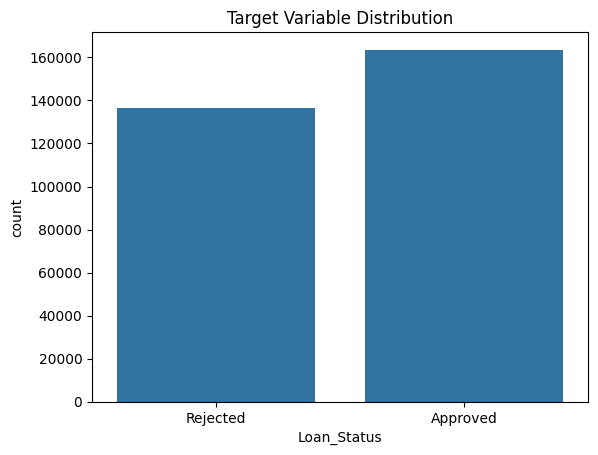

In [8]:
# Target Variable Distribution by countplot
df1 = 'Loan_Status' # Targeted Column
sns.countplot(data=df , x=df1)
plt.title("Target Variable Distribution")
plt.show()

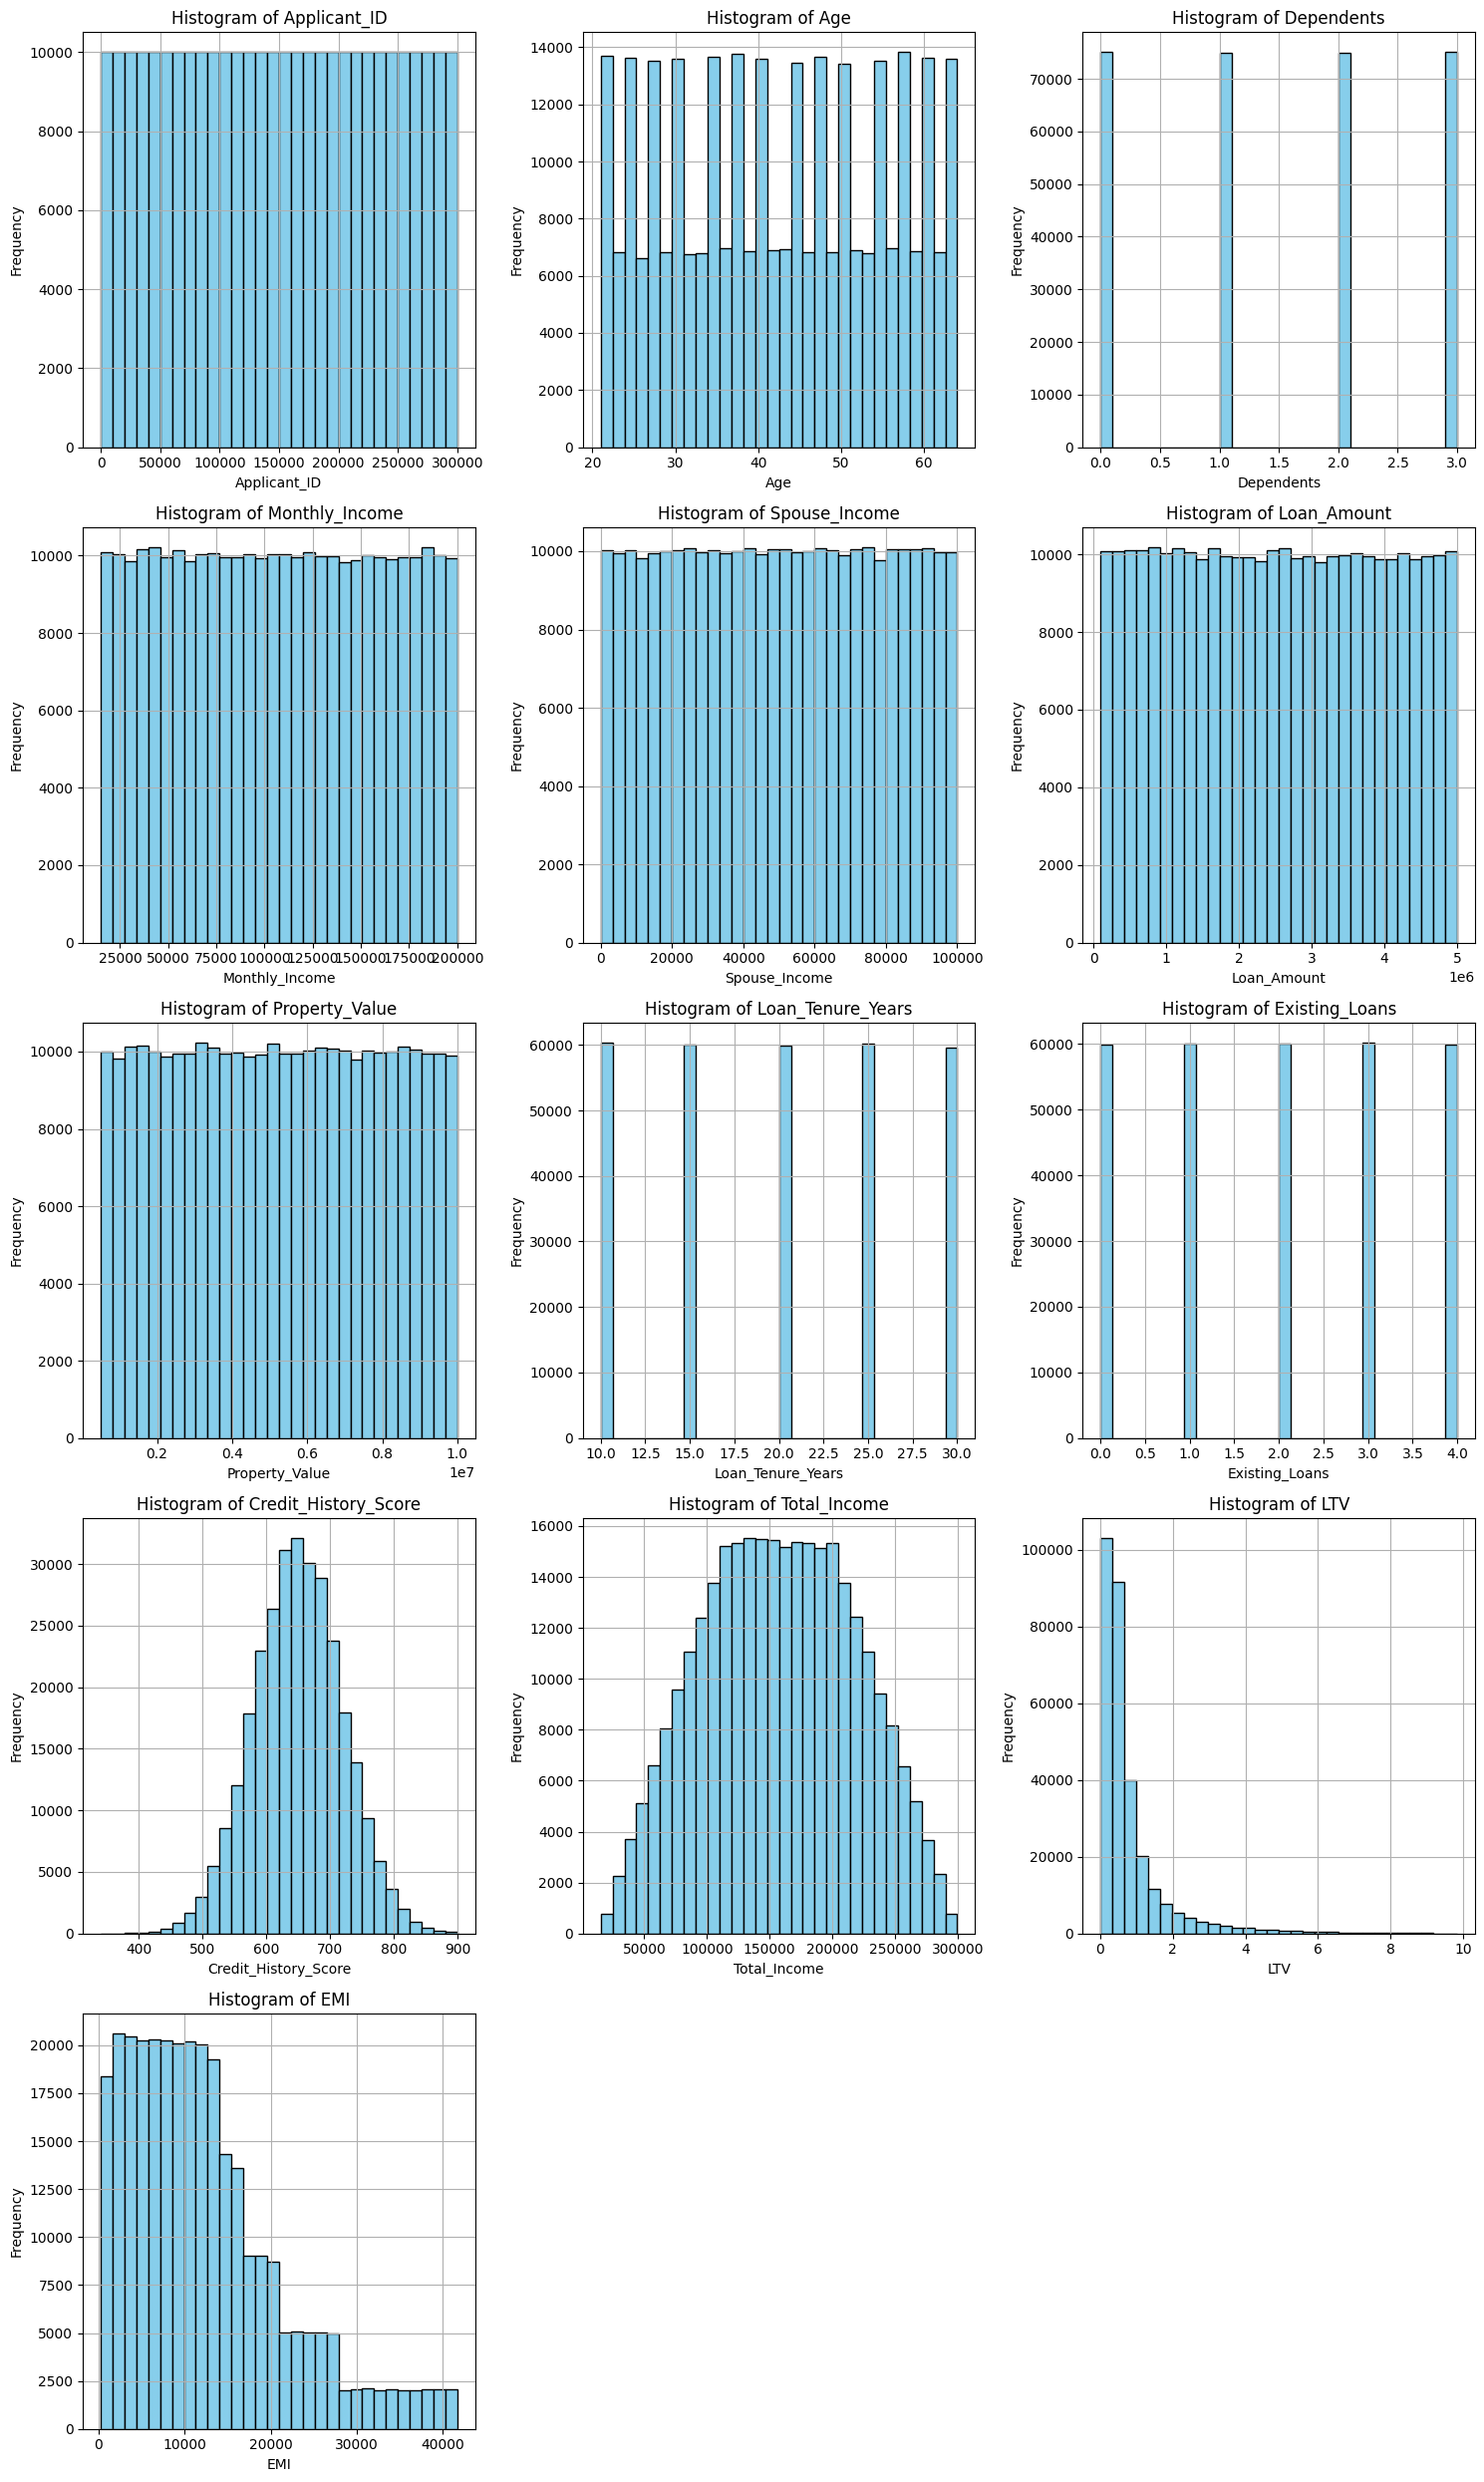

In [9]:
#
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=np.number).columns
n = len(numeric_cols)

# Setup grid for subplots
cols = 3  # 3 histograms per row
rows = n // cols + (n % cols > 0)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f'Histogram of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()


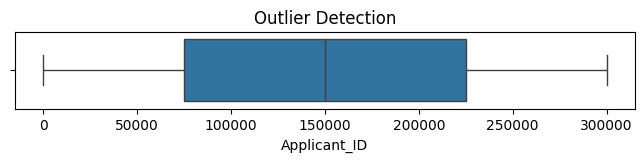

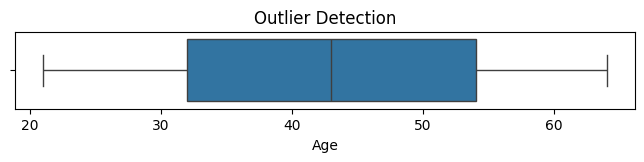

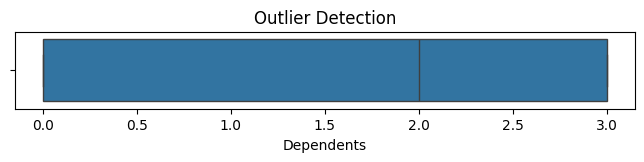

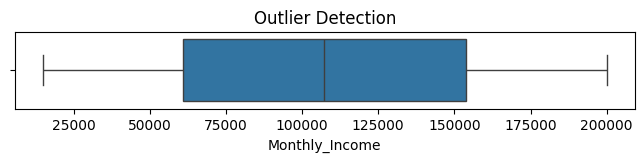

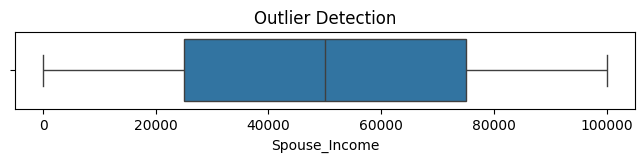

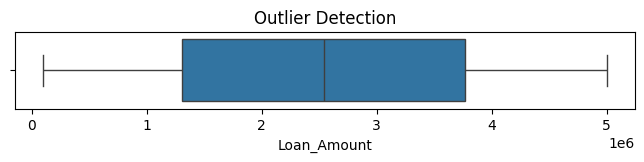

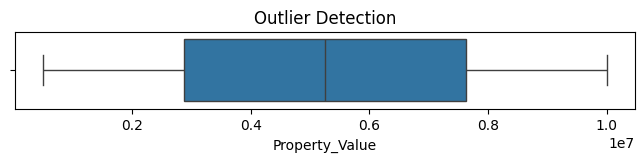

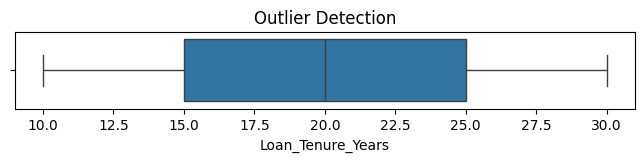

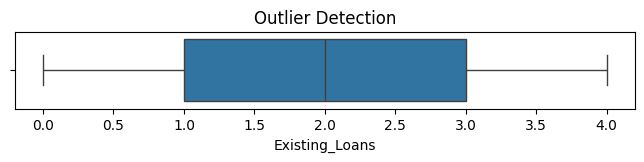

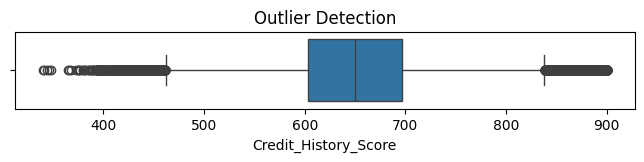

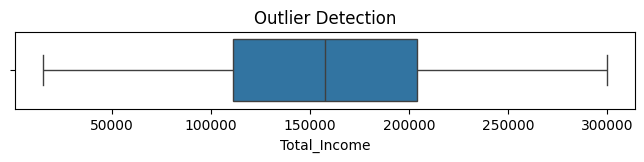

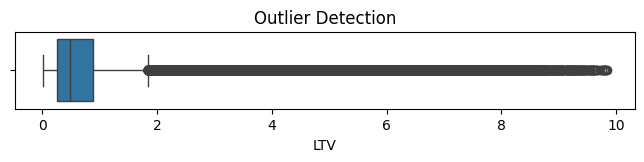

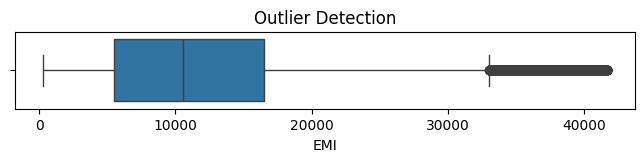

In [10]:
#  Boxplots for Outliers
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col])
    plt.title("Outlier Detection")
    plt.show()


In [11]:
# Filter only numeric columns
num_df = df.select_dtypes(include='number')

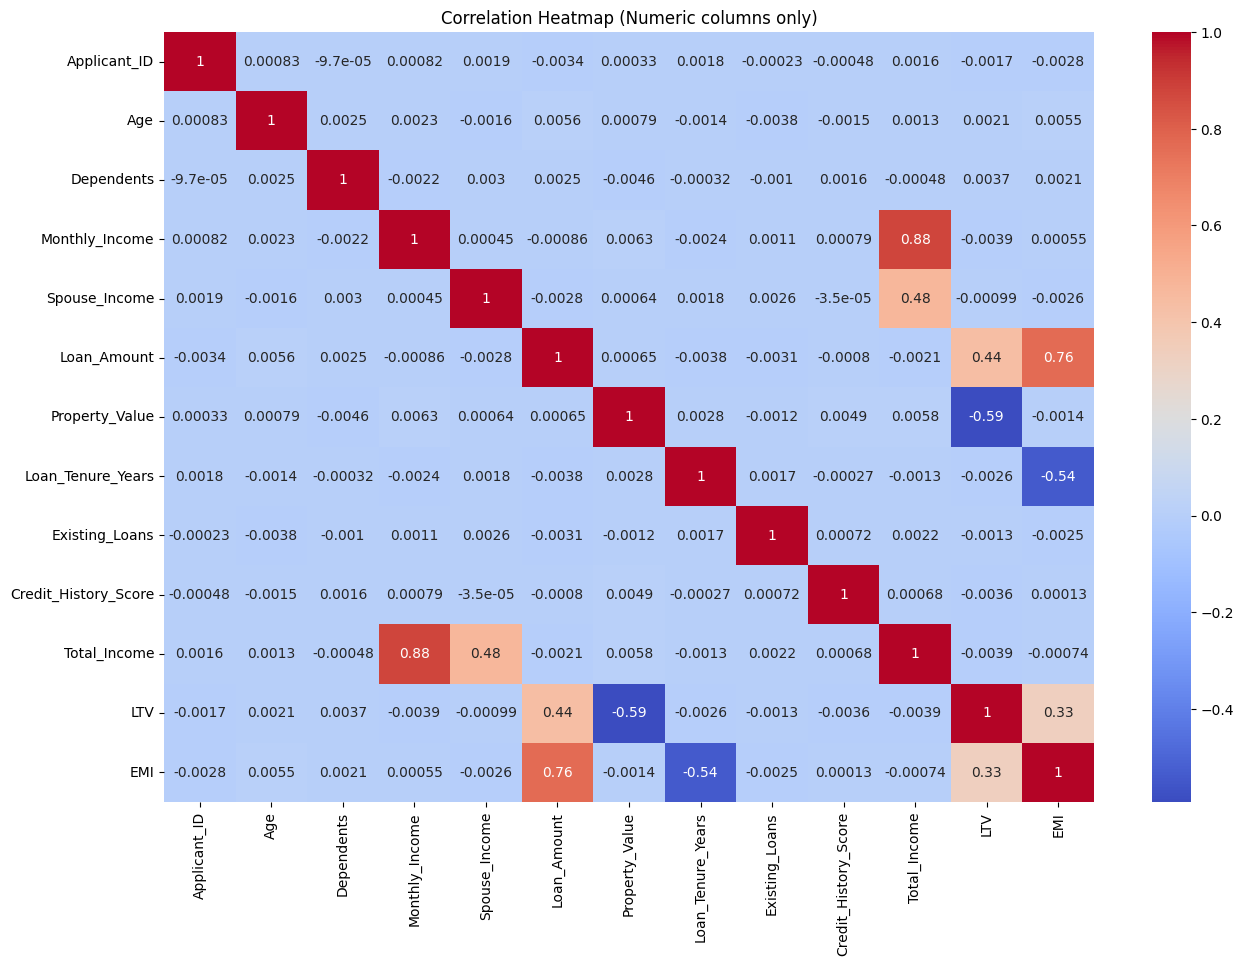

In [12]:
# Correlation HeatMap
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric columns only)")
plt.show()

# **DATA CLEANING & PREPROCESSING**

In [13]:
# Handling Missing Values by filling them with median
df[col].fillna(df[col].median(), inplace=True)
df.head()

,Applicant_ID,Age,Marital_Status,Dependents,Monthly_Income,Spouse_Income,Loan_Amount,Property_Value,Loan_Tenure_Years,Existing_Loans,...,Property_Type,Location,Verification_Status,Total_Income,LTV,EMI,Loan_Status,Loan_Default,Risk_Category,Investment_Label
0,1.0,59.0,Divorced,2.0,158263.0,78900.0,356051.0,2095139.0,15.0,3.0,...,Apartment,Bangalore,Verified,237163.0,0.169941,1978.06,Rejected,Yes,High,Avoid
1,2.0,49.0,Divorced,1.0,173373.0,79183.0,2313653.0,4677118.0,30.0,0.0,...,Independent House,Hyderabad,Verified,252556.0,0.494675,6426.81,Approved,No,Low,Invest
2,3.0,35.0,Single,1.0,153703.0,44412.0,1526945.0,1839546.0,25.0,1.0,...,Villa,Mumbai,Verified,198115.0,0.830066,5089.82,Rejected,No,Medium,Review Further
3,4.0,63.0,Divorced,2.0,164520.0,67619.0,381411.0,5777938.0,25.0,4.0,...,Independent House,Bangalore,Verified,232139.0,0.066012,1271.37,Rejected,Yes,High,Avoid
4,5.0,28.0,Single,1.0,15217.0,13357.0,3762536.0,7566890.0,25.0,4.0,...,Apartment,Bangalore,Rejected,28574.0,0.497237,12541.79,Approved,No,Medium,Review Further


In [14]:
# Encoding Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
  df[col] = le.fit_transform(df[col])

# Feature Scalling

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Applicant_ID,Age,Marital_Status,Dependents,Monthly_Income,Spouse_Income,Loan_Amount,Property_Value,Loan_Tenure_Years,Existing_Loans,...,Property_Type,Location,Verification_Status,Total_Income,LTV,EMI,Loan_Status,Loan_Default,Risk_Category,Investment_Label
0,-1.732022,1.298310,0,0.446866,0.951963,1.000498,-1.544187,-1.150629,-0.704193,0.707578,...,0,0,2,1.312791,-0.617802,-1.150613,1,1,0,0
1,-1.732011,0.510556,0,-0.447187,1.234694,1.010304,-0.162030,-0.208575,1.417451,-1.415361,...,1,3,2,1.566180,-0.299473,-0.655517,0,0,1,1
2,-1.731999,-0.592301,2,-0.447187,0.866639,-0.194556,-0.717482,-1.243884,0.710237,-0.707715,...,2,5,2,0.670009,0.029304,-0.804309,1,0,2,2
3,-1.731988,1.613412,0,0.446866,1.069041,0.609596,-1.526282,0.193067,0.710237,1.415225,...,1,0,2,1.230089,-0.719682,-1.229259,1,1,0,0
4,-1.731976,-1.143729,2,-0.447187,-1.724641,-1.270652,0.860948,0.845779,0.710237,1.415225,...,0,0,1,-2.120859,-0.296961,0.025010,0,0,2,2


# **FEATURE ENGINEERING AND SELECTION**

#  1. Derive New Features

In [15]:
# 1. Income to Loan ratio (if applicable)
if 'ApplicantIncome' in df.columns and 'LoanAmount' in df.columns:
    df['Income_Loan_Ratio'] = df['ApplicantIncome'] / (df['LoanAmount'] + 1)

In [16]:
# 2. Binning ApplicantIncome into categories
if 'ApplicantIncome' in df.columns:
    df['Income_Bin'] = pd.cut(df['ApplicantIncome'],
                              bins=[0, 2500, 4000, 6000, 8000, np.inf],
                              labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [17]:
# 3. Length of text feature (if present like 'Purpose' or 'Remarks')
for col in df.select_dtypes(include='object'):
    df[f'{col}_length'] = df[col].astype(str).apply(len)

# 2. Correlation Analysis (Numerical Features)

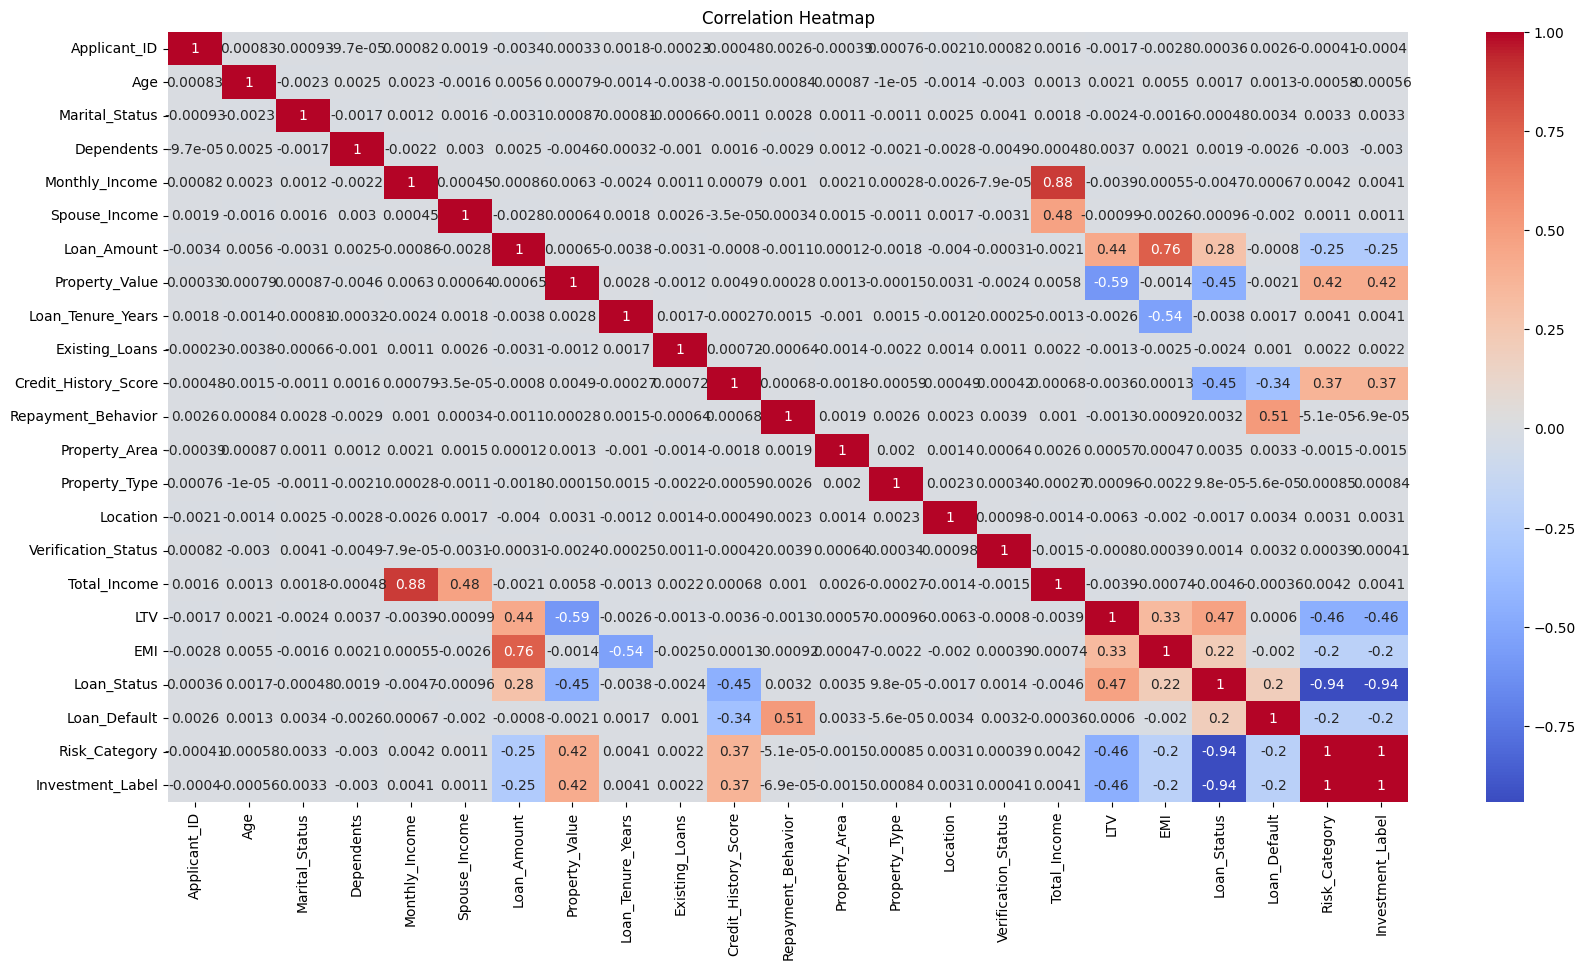

In [18]:
num_df = df.select_dtypes(include='number')

plt.figure(figsize=(20,10 ))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 3. Feature Selection Techniques

In [19]:
# Define X, y and Handle Missing Values
y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X.head()

,Applicant_ID,Age,Marital_Status,Dependents,Monthly_Income,Spouse_Income,Loan_Amount,Property_Value,Loan_Tenure_Years,Existing_Loans,...,Property_Area,Property_Type,Location,Verification_Status,Total_Income,LTV,EMI,Loan_Default,Risk_Category,Investment_Label
0,-1.732022,1.298310,0.0,0.446866,0.951963,1.000498,-1.544187,-1.150629,-0.704193,0.707578,...,0.0,0.0,0.0,2.0,1.312791,-0.617802,-1.150613,1.0,0.0,0.0
1,-1.732011,0.510556,0.0,-0.447187,1.234694,1.010304,-0.162030,-0.208575,1.417451,-1.415361,...,2.0,1.0,3.0,2.0,1.566180,-0.299473,-0.655517,0.0,1.0,1.0
2,-1.731999,-0.592301,2.0,-0.447187,0.866639,-0.194556,-0.717482,-1.243884,0.710237,-0.707715,...,0.0,2.0,5.0,2.0,0.670009,0.029304,-0.804309,0.0,2.0,2.0
3,-1.731988,1.613412,0.0,0.446866,1.069041,0.609596,-1.526282,0.193067,0.710237,1.415225,...,1.0,1.0,0.0,2.0,1.230089,-0.719682,-1.229259,1.0,0.0,0.0
4,-1.731976,-1.143729,2.0,-0.447187,-1.724641,-1.270652,0.860948,0.845779,0.710237,1.415225,...,0.0,0.0,0.0,1.0,-2.120859,-0.296961,0.025010,0.0,2.0,2.0


In [20]:
# Standardization and Min-Max Scaling
# Standardization
standard_scaler = StandardScaler()
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)

In [21]:
# Lasso Feature Selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_standardized, y)

print("Best alpha from LassoCV:", lasso.alpha_)

lasso_selector = SelectFromModel(lasso, prefit=True)
X_lasso = lasso_selector.transform(X_standardized)
lasso_features = X.columns[lasso_selector.get_support()]

print("Lasso-selected features:", list(lasso_features))

X_lasso_df = pd.DataFrame(X_lasso, columns=lasso_features)

Best alpha from LassoCV: 0.0004692471345802448
Lasso-selected features: ['Marital_Status', 'Loan_Amount', 'Property_Value', 'Credit_History_Score', 'Repayment_Behavior', 'Property_Area', 'Location', 'Verification_Status', 'LTV', 'Loan_Default', 'Risk_Category', 'Investment_Label']


In [22]:
# RFE with logistic regression
rfe_model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=rfe_model, n_features_to_select=10)
rfe.fit(X_standardized, y)

# Get selected features
rfe_features = X.columns[rfe.support_]

X_rfe_df = X.loc[:, rfe.support_]  # Works with pandas DataFrame

print("RFE-selected features:", list(rfe_features))
print("X_rfe_df shape:", X_rfe_df.shape)

RFE-selected features: ['Marital_Status', 'Credit_History_Score', 'Property_Area', 'Property_Type', 'Location', 'Verification_Status', 'LTV', 'Loan_Default', 'Risk_Category', 'Investment_Label']
X_rfe_df shape: (300100, 10)


In [23]:
# PCA & LDA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_standardized)
print("PCA Explained Variance:", pca.explained_variance_ratio_)

PCA Explained Variance: [0.14182017 0.09092633 0.08447275 0.07036958 0.05230211]


In [24]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_standardized, y)
print("LDA shape:", X_lda.shape)

LDA shape: (300100, 1)


#Model Training

In [25]:
# Train-Test Split (use Lasso-selected features)
X_train, X_test, y_train, y_test = train_test_split(X_lasso_df, y, test_size=0.2, random_state=42)

In [26]:
X_train

,Marital_Status,Loan_Amount,Property_Value,Credit_History_Score,Repayment_Behavior,Property_Area,Location,Verification_Status,LTV,Loan_Default,Risk_Category,Investment_Label
96410,1.341907,0.564113,-0.221538,-0.142891,0.184806,1.225676,-1.464439,0.480496,-0.078532,-0.449773,0.957317,0.957301
60168,-0.445226,1.216214,0.041234,-1.113819,2.038491,1.225676,-1.464439,0.480496,-0.004480,2.217860,-1.100147,-1.100143
60236,-1.338792,-0.371141,0.332343,0.271181,0.184806,-0.000629,0.878279,0.480496,-0.463291,-0.449773,0.957317,0.957301
32958,0.448340,-0.051685,-1.476380,1.284944,0.184806,-0.000629,0.878279,0.480496,1.228920,-0.449773,-1.100147,-1.100143
101214,-1.338792,-0.680465,1.608517,-1.099540,0.184806,1.225676,-1.464439,0.480496,-0.624057,-0.449773,-1.100147,-1.100143
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.448340,-1.438145,0.811284,1.613346,0.184806,-0.000629,-0.293080,0.480496,-0.717956,-0.449773,-0.071415,-0.071421
259178,-0.445226,-1.174949,1.697116,1.127882,0.184806,-1.226934,0.878279,-2.277326,-0.697338,-0.449773,0.957317,0.957301
131932,-1.338792,0.855978,0.547105,0.399686,0.184806,-0.000629,0.292600,-2.277326,-0.238825,-0.449773,0.957317,0.957301
146867,-0.445226,-0.107529,0.523865,-1.513613,0.184806,-0.000629,-0.293080,0.480496,-0.433752,2.217860,-1.100147,-1.100143


## Train 3 Models

In [27]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 240080, number of used features: 12
[LightGBM] [Info] Start training from score -0.606302
[LightGBM] [Info] Start training from score -0.788643
[LightGBM] [Info] Start training from score -8.651058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

LGBMClassifier()

In [30]:
# Cross-Validation
models = {
    "Logistic Regression": lr_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

for name, model in models.items():
    scores = cross_val_score(model, X_lasso_df, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.9865
XGBoost Cross-Validation Accuracy: 0.9990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 240080, number of used features: 12
[LightGBM] [Info] Start training from score -0.606829
[LightGBM] [Info] Start training from score -0.788011
[LightGBM] [Info] Start training from score -8.651058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

#Hyperparameter Tuning (XGBoost)

In [31]:
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
print("Best XGBoost Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


#Model Evaluation

In [32]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.9861712762412529
Precision: 0.9909563706991952
Recall: 0.9904667226468392
F1 Score: 0.9907004007418667
MAE: 0.013828723758747084
RMSE: 0.11759559412982734
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     32647
           1       0.99      0.98      0.98     27363
           2       1.00      1.00      1.00        10

    accuracy                           0.99     60020
   macro avg       0.99      0.99      0.99     60020
weighted avg       0.99      0.99      0.99     60020


XGBoost
Accuracy: 0.9986337887370876
Precision: 0.9990586106249438
Recall: 0.9991055827799773
F1 Score: 0.9990819877343591
MAE: 0.0013662112629123624
RMSE: 0.03696229515211904
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     32647
           1       1.00      1.00      1.00     27363
           2       1.00      1.00      1.00

In [33]:
import pandas as pd
import numpy as np

# Final 12 feature names in training order
feature_columns = [
    'Marital_Status', 'Loan_Amount', 'Property_Value', 'Credit_History_Score',
    'Repayment_Behavior', 'Property_Area', 'Location', 'Verification_Status',
    'LTV', 'Loan_Default', 'Risk_Category', 'Investment_Label'
]

# Input values from your example (already scaled/encoded)
input_values = [
    1.341907, 0.564113, -0.221538, -0.142891,
    0.184806, 1.225676, -1.464439, 0.480496,
    -0.078532, -0.449773, 0.957317, 0.957301
]

# Create a DataFrame with the correct structure
input_df = pd.DataFrame([input_values], columns=feature_columns)

# Predict
prediction = model.predict(input_df)
probability = model.predict_proba(input_df)[0][1]

# Show result
if prediction[0] == 1:
    print(f"Loan Approved (Confidence: {probability:.2f})")
else:
    print(f" Loan Rejected (Confidence: {1 - probability:.2f})")


 Loan Rejected (Confidence: 1.00)


In [34]:
new_applicant_values = [
    0.410234,    # Marital_Status (stable/married)
    -0.950123,   # Loan_Amount (small loan)
    1.120456,    # Property_Value (high-value asset)
    1.300789,    # Credit_History_Score (excellent)
    1.050678,    # Repayment_Behavior (perfect payment history)
    0.480123,    # Property_Area (urban/semi-urban)
    0.650987,    # Location (low-risk region)
    0.900123,    # Verification_Status (fully verified)
    -0.600456,   # LTV (very low loan-to-value)
    -0.800987,   # Loan_Default (no prior default)
    -1.100234,   # Risk_Category (safe borrower)
    -0.900123    # Investment_Label (low-risk investment)
]


In [35]:
input_df = pd.DataFrame([new_applicant_values], columns=feature_columns)

prediction = best_xgb_model.predict(input_df)
probability = best_xgb_model.predict_proba(input_df)[0][1]

if prediction[0] == 1:
    print(f" Loan Approved (Confidence: {probability:.2f})")
else:
    print(f" Loan Rejected (Confidence: {1 - probability:.2f})")


 Loan Approved (Confidence: 0.99)


In [36]:
import pandas as pd
import numpy as np

# Final 12 feature names in training order
feature_columns = [
    'Marital_Status', 'Loan_Amount', 'Property_Value', 'Credit_History_Score',
    'Repayment_Behavior', 'Property_Area', 'Location', 'Verification_Status',
    'LTV', 'Loan_Default', 'Risk_Category', 'Investment_Label'
]

# Input values from your example (already scaled/encoded)
input_values = [
    1.341907, 0.564113, -0.221538, -0.142891,
    0.184806, 1.225676, -1.464439, 0.480496,
    -0.078532, -0.449773, 0.957317, 0.957301
]

# Create a DataFrame with the correct structure
input_df = pd.DataFrame([input_values], columns=feature_columns)

# Predict
prediction = model.predict(input_df)
probability = model.predict_proba(input_df)[0][1]

# Show result
if prediction[0] == 1:
    print(f" Loan Approved (Confidence: {probability:.2f})")
else:
    print(f" Loan Rejected (Confidence: {1 - probability:.2f})")


 Loan Rejected (Confidence: 1.00)
